# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [11]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

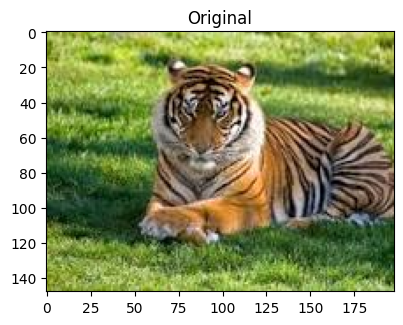

In [12]:
# Load our image
image = cv2.imread('tiger.jpg')
imshow("Original", image)

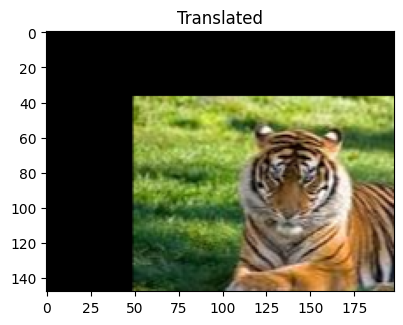

In [13]:
# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [14]:
# What does T look like
print(T)

print(height, width )

[[ 1.   0.  49.5]
 [ 0.   1.  37. ]]
148 198


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


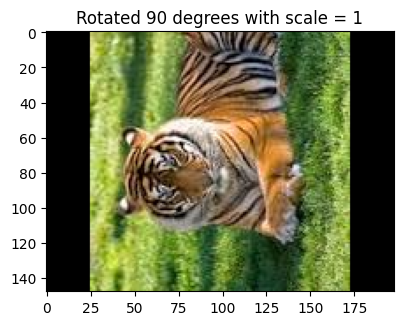

In [18]:
# Load our image
image = cv2.imread('tiger.jpg')
height, width = image.shape[:2]

# Divide by two to rotate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  6.200000e+01]
 [-5.000000e-01  3.061617e-17  1.235000e+02]]


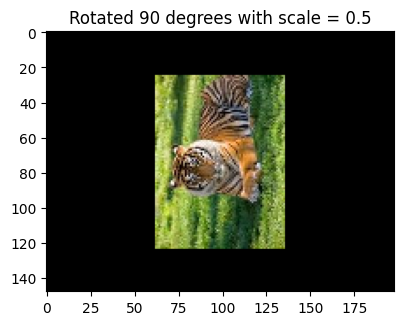

In [19]:
# Divide by two to rotate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




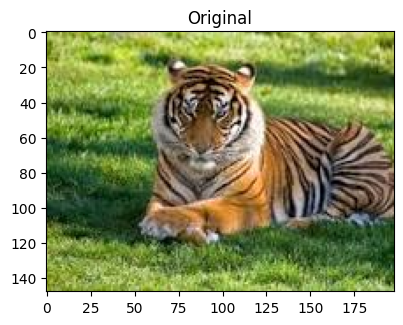

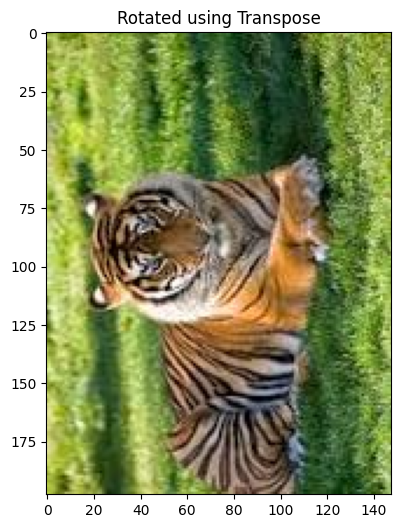

In [20]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

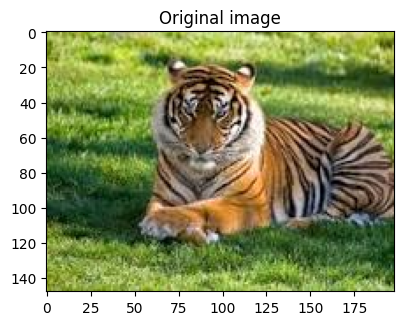

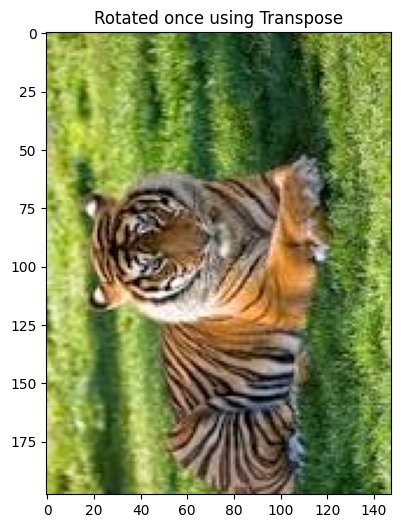

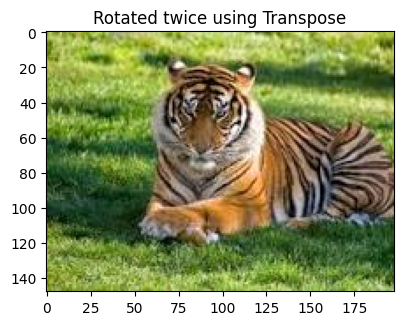

In [25]:
rotated_image = cv2.transpose(image)
rotated2_image = cv2.transpose(rotated_image)

imshow('Original image',image)
imshow("Rotated once using Transpose", rotated_image)
imshow("Rotated twice using Transpose", rotated2_image)

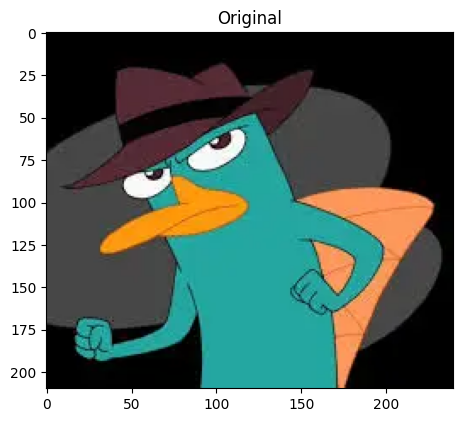

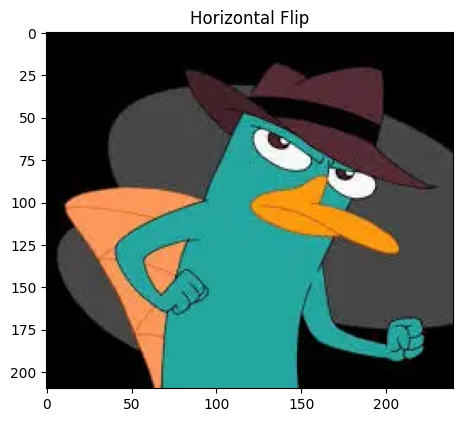

In [28]:
# Let's now to a horizontal flip.
image = cv2.imread('perrytheplatypus.webp')
flipped = cv2.flip(image, 1)
imshow('Original',image)
imshow("Horizontal Flip", flipped)